In [1]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.widgets import Slider

import random
import math
import numpy as np


In [2]:
df = pd.read_csv("../dataset/exoplanet.eu_catalog.csv")

orbit_data = df[["semi_major_axis","eccentricity", "temp_calculated"]].dropna()
orbit_data["semi_minor_axis"] = orbit_data["semi_major_axis"]*(1 - orbit_data["eccentricity"]**2)**0.5
orbit_data["focus_length"] = (orbit_data["semi_major_axis"]**2 - orbit_data["semi_minor_axis"]**2)**0.5

In [3]:
planets = {
    'name': ['mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune'],
    'semi_major_axis': [0.3871, 0.7233, 1, 1.5273, 5.2028, 9.5388, 19.1914, 30.0611],
    'color': ['#B5A7A7', '#d3a567', '#6b93d6', '#c1440e', '#90614D', '#C5AB6E', '#4FD0E7', '#4b70dd'],
    'eccentricity': [0 for i in range(8)],
    'focus_length': [0 for i in range(8)]
    }
planets = pd.DataFrame(data=planets)
planets["semi_minor_axis"] = planets["semi_major_axis"]

<IPython.core.display.Javascript object>


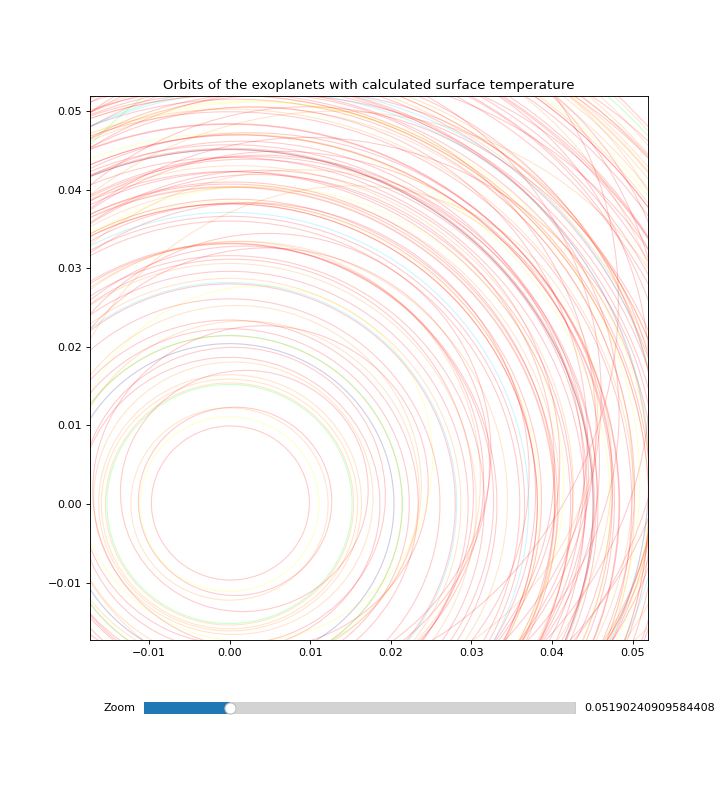

Text(0.5, 1.0, 'Orbits of the exoplanets with calculated surface temperature')

In [4]:
fig, ax = plt.subplots(figsize=(9, 10))

ax.set_xlim(-2/3,2)
ax.set_ylim(-2/3,2)
ax.set_title('Orbits of the exoplanets with calculated surface temperature')

In [5]:
def temp_to_color(temp):
    if temp <= 0:
        return None 
    elif temp <= 273.15 - 200:
        return "#020024"
    elif temp <= 273.15 - 100:
        return "#090979"
    elif temp <= 273.15:
        return "#00d4ff"
    elif temp <= 273.15 + 100:
        return "#00ff08"
    elif temp <= 273.15 + 200:
        return "#f9ff00"
    elif temp <= 273.15 + 500:
        return "#ff8000"
    elif temp <= 273.15 + 1000:
        return "#ff0000"

In [6]:
for index, orbit in orbit_data.iterrows():
        # for index, orbit in orbit_data.head(100).iterrows():
        angle = random.randint(15,75)
        focus_shift_x = orbit["focus_length"]*math.cos(3.14*angle/180)
        focus_shift_y = orbit["focus_length"]*math.sin(3.14*angle/180)
        
        
        ax.add_patch(mpl.patches.Ellipse((focus_shift_x, focus_shift_y), 2*orbit["semi_major_axis"],2*orbit["semi_minor_axis"], angle=angle, edgecolor=temp_to_color(orbit["temp_calculated"]),facecolor='none', alpha=0.2))
        
planets_names = {}

for index, planet in planets.iterrows():
        # for index, planet in planet_data.head(100).iterrows():
        ax.add_patch(mpl.patches.Ellipse((0, 0), 2*planet["semi_major_axis"]*1.002,2*planet["semi_minor_axis"]*1.002, edgecolor=planet["color"], facecolor='none', alpha=1))
        ax.add_patch(mpl.patches.Ellipse((0, 0), 2*planet["semi_major_axis"],2*planet["semi_minor_axis"], edgecolor=planet["color"], facecolor='none', alpha=1, label=planet["name"]))
        ax.add_patch(mpl.patches.Ellipse((0, 0), 2*planet["semi_major_axis"]*0.998,2*planet["semi_minor_axis"]*0.998, edgecolor=planet["color"], facecolor='none', alpha=1))

        planets_names[planet['name']] = ax.text(0, planet["semi_major_axis"]*1.05, planet['name'], fontsize=10, color=planet["color"])
        
for planet_name in planets_names:
    planets_names[planet_name].set_visible(False)
    
planets_names['mars'].set_visible(True)

In [7]:
plt.subplots_adjust(bottom=0.2)

In [8]:
# Create the RangeSlider
slider_ax = plt.axes([0.20, 0.1, 0.60, 0.03])
slider = Slider(
    ax=slider_ax,
    label='Zoom',
    valmin=-2,
    valmax=np.log10(orbit_data["semi_major_axis"].max()*2),
    valinit=2,
)

In [9]:
# Create the Vertical lines on the histogram
# limit_line = axs[1].axvline(np.log(slider.val), color='k')

In [10]:
# function to update planet text
numbers = [0, 0.3871, 0.7233, 1, 1.5273, 5.2028, 9.5388, 19.1914, 30.0611,100]
names = [None, 'mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune','']

for num in range(7):
    numbers[num] *= 1.15
    

In [11]:
def update(val):
    amp = 10**slider.val
    slider.valtext.set_text(amp)

    # Update the image's colormap
    ax.set_xlim(-amp/3,amp)
    ax.set_ylim(-amp/3,amp)

    for planet_name in planets_names:
        planets_names[planet_name].set_visible(False)
    
    for i in range(9):
        if numbers[i] >= amp:
            break
    i -= 1
    if names[i]:
        planets_names[names[i]].set_visible(True)
    
    
    fig.canvas.draw_idle()

In [12]:
slider.on_changed(update)
plt.show()